# My saving should go to the mortgage or invest into shares ?

In the simulation below, I assume :
* Once the mortgage is paid, all your saving will be directed to your shares investment.
* Payment happen monthly, thus compound happen monthly

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams["figure.figsize"] = (20,7) 
plt.rcParams.update({'font.size': 14})   

def calc(income,capital,bankInterest,shareInterest,toShare,numYear=40):
    m=0
    inShare=[0]
    cap=[capital]
    bInt=[0]
    shareInt=[0]
    noMortgage=None
    
    while True:
        m+=1
        
        if cap[-1] > 0:
            bInt.append(cap[-1] * bankInterest/100/12)
            #toPay = cap[-1] + bInt[-1]
            paidBank=income - toShare
            cap.append(cap[-1] + bInt[-1] - paidBank)

            shareInt.append(inShare[-1] * shareInterest/100/12)
            inShare.append(inShare[-1] + shareInt[-1] + toShare)
        
        else:
            if noMortgage is None:
                noMortgage=m
            bInt.append(0)            
            cap.append(cap[-1])
            shareInt.append(inShare[-1] * shareInterest/100/12)
            inShare.append(inShare[-1] + shareInt[-1] + income)
            
        if m >= 12*numYear:
            break

    xarr=[m/12 for m in list(range(0,len(cap)))]
    paid=[income - toShare]* len(xarr)
    oldCap=[0] + cap
    oldCap=oldCap[:-1]
    df=pd.DataFrame({'year':xarr,'capital':cap,'bankInterest':bInt,'oldCap':oldCap,'paid':paid,
                    'share':inShare})
    df = df.set_index(['year'])
    
    
    plt.plot(-df.capital,color="red",label="")
    plt.fill_between(df.index,-df.capital,alpha=0.1,color="red",label="mortgage")
    plt.plot(-df.capital + df.share,label="net value")
    plt.fill_between(df.index,-df.capital + df.share,-df.capital,color="green",alpha=0.2,label="share value")
    plt.axhline(y=0,color="black")
    plt.grid()
    plt.legend()
    plt.xlabel("year")
    
    netVal=inShare[-1] - cap[-1]
    if noMortgage is None:
        plt.title(f"Mortgage of {cap[-1]/1000:.1f}k. Net value after {numYear} years: {netVal/1000:.1f}k")
    else:
        plt.title(f"Mortgage paid after {noMortgage/12:.1f} year. Net value after {numYear} years: {netVal/1000:.1f}k")
    
    return df

In [3]:
monthlySaving=4000
mortgage=800000

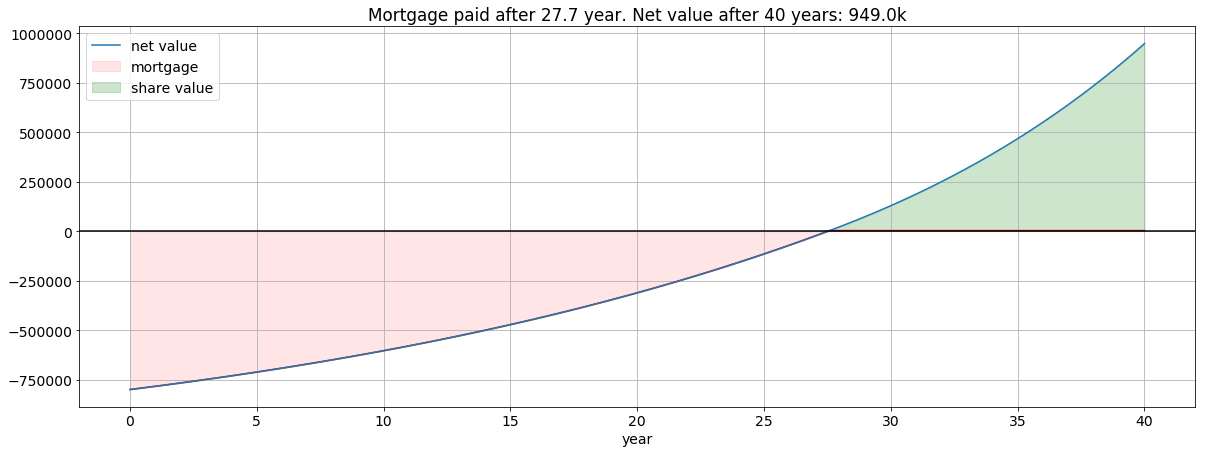

In [4]:
df=calc(income=monthlySaving, # How much saving can be use for paying mortgage or investment
    capital=mortgage,         # Your initial mortgage/debt
    bankInterest=4,           # Annual bank interest on the mortgage, in %
    shareInterest=7,          # Annual share interest, in %
    toShare=0)                # Amount of money in your saving that you want to use for investment in share

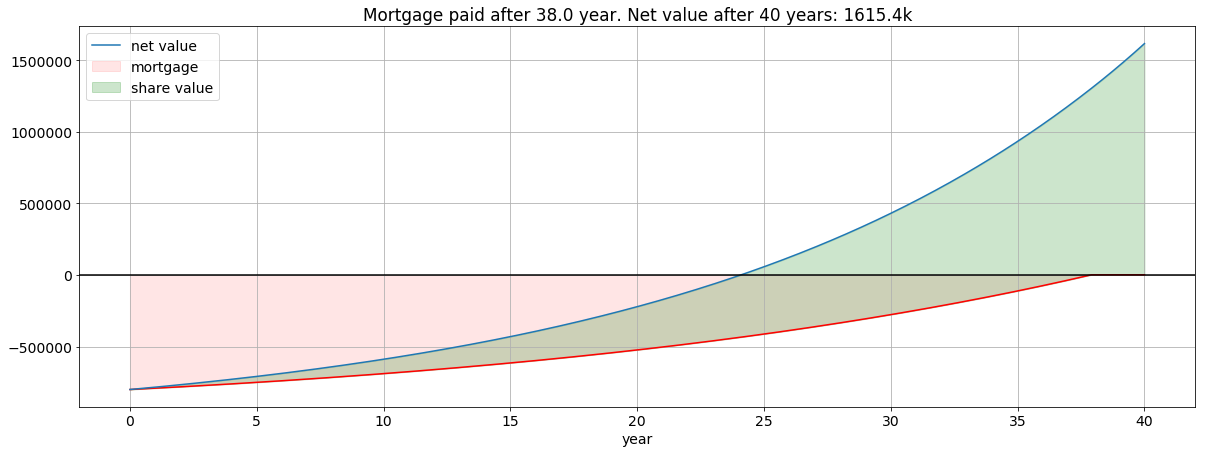

In [5]:
df=calc(income=monthlySaving,
    capital=mortgage,
    bankInterest=4,
    shareInterest=7,
    toShare=580)

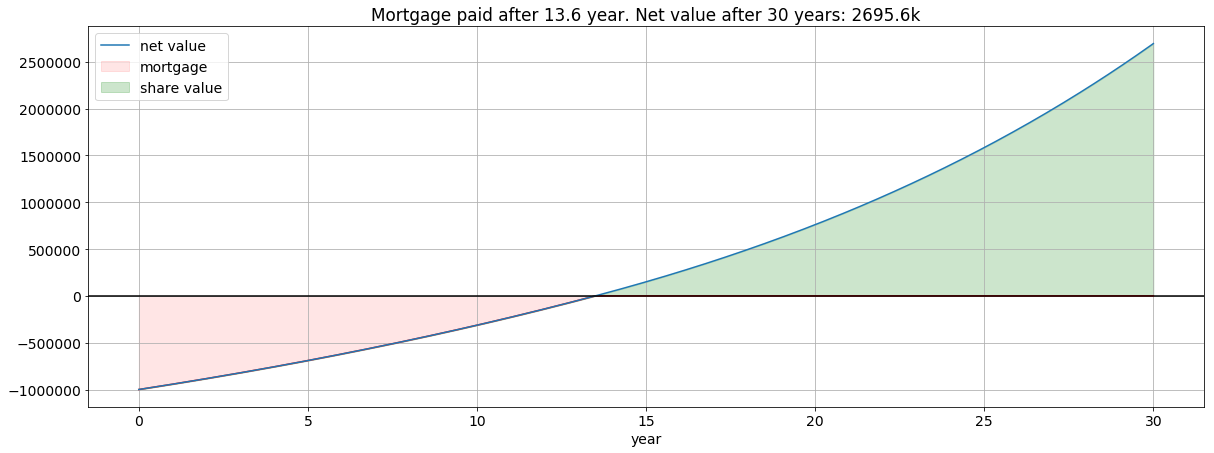

In [6]:
df=calc(income=8000,
    capital=1000000,
    bankInterest=4,
    shareInterest=6,
    toShare=0,
    numYear=30)

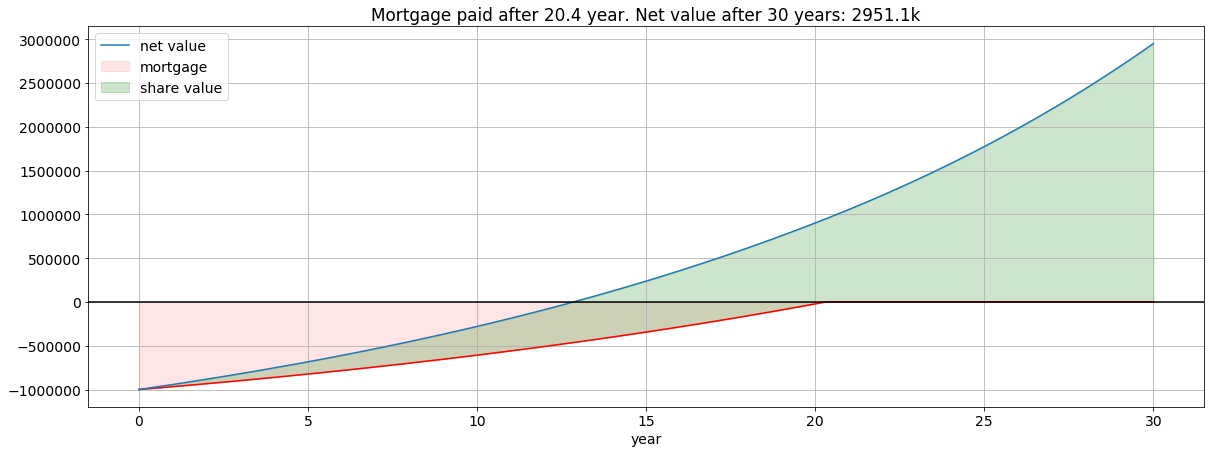

In [7]:
df=calc(income=8000,
    capital=1000000,
    bankInterest=4,
    shareInterest=6,
    toShare=2000,
    numYear=30)

## Want to use your own numbers and have a play around ? 
Use this link:
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/financePloter/financePlot/HEAD?labpath=mortgageVsShare.ipynb)